# UK House Price EDA


The data for this project is taken from https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads. 

Contains HM Land Registry data © Crown copyright and database right 2021. This data is licensed under the Open Government Licence v3.0.



We begin by using the data from years 2023-2025 as a smaller sample size, which can be extended to larger data sets once the methodology has been verified. 

In [1]:
# Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


### Importing Raw data

In [2]:
cols = [
    "transaction_id",
    "price",
    "date_of_transfer",
    "postcode",
    "property_type",
    "new_build_flag",
    "tenure",
    "primary_addressable_object_name",
    "secondary_addressable_object_name",
    "street",
    "locality",
    "town_or_city",
    "district",
    "county",
    "transaction_category",
    "record_status",
]

raw_df_25 = pd.read_csv("..\\data\\raw\\pp-2025.csv", header=None, names=cols)
raw_df_24 = pd.read_csv("..\\data\\raw\\pp-2024.csv", header=None, names=cols)
raw_df_23 = pd.read_csv("..\\data\\raw\\pp-2023.csv", header=None, names=cols)

frames = [raw_df_25, raw_df_24, raw_df_23]
raw_df = pd.concat(frames)

Logic check for the size of the combined file.

In [3]:
print(f"Number of Rows: {raw_df_25.shape[0]}, Number of Columns: {raw_df_25.shape[1]}" )
print(f"Number of Rows: {raw_df_24.shape[0]}, Number of Columns: {raw_df_24.shape[1]}" )
print(f"Number of Rows: {raw_df_23.shape[0]}, Number of Columns: {raw_df_23.shape[1]}" )
print(f"Number of Rows: {raw_df.shape[0]}, Number of Columns: {raw_df.shape[1]}" )



Number of Rows: 446867, Number of Columns: 16
Number of Rows: 881757, Number of Columns: 16
Number of Rows: 855766, Number of Columns: 16
Number of Rows: 2184390, Number of Columns: 16


In [4]:
raw_df.head()

,transaction_id,price,date_of_transfer,postcode,property_type,new_build_flag,tenure,primary_addressable_object_name,secondary_addressable_object_name,street,locality,town_or_city,district,county,transaction_category,record_status
0,{3DCCB7C9-94EA-5B9D-E063-4704A8C0331E},451225,2025-07-31 00:00,N15 4AB,F,N,L,288,NaN,PHILIP LANE,NaN,LONDON,HARINGEY,GREATER LONDON,A,A
1,{3DCCB7C9-94EB-5B9D-E063-4704A8C0331E},485000,2025-01-20 00:00,N4 4NR,F,N,L,CONNAUGHT LODGE,FLAT 19,CONNAUGHT ROAD,NaN,LONDON,HARINGEY,GREATER LONDON,A,A
2,{3DCCB7C9-94ED-5B9D-E063-4704A8C0331E},380000,2025-03-20 00:00,N21 3AN,T,N,L,41A,NaN,FERNLEIGH ROAD,NaN,LONDON,ENFIELD,GREATER LONDON,A,A
3,{3DCCB7C9-94EE-5B9D-E063-4704A8C0331E},730000,2025-03-27 00:00,EN5 3LT,S,N,F,3,NaN,HAYDEN CLOSE,NaN,BARNET,BARNET,GREATER LONDON,A,A
4,{3DCCB7C9-94F0-5B9D-E063-4704A8C0331E},325000,2025-03-28 00:00,EN5 1HY,F,N,L,"LANDER COURT, 48",2,LYONSDOWN ROAD,NEW BARNET,BARNET,BARNET,GREATER LONDON,A,A


In [5]:
raw_df.tail()

,transaction_id,price,date_of_transfer,postcode,property_type,new_build_flag,tenure,primary_addressable_object_name,secondary_addressable_object_name,street,locality,town_or_city,district,county,transaction_category,record_status
855761,{06C9F487-585E-9388-E063-4804A8C0BD98},172500,2023-03-03 00:00,CM8 2AW,F,N,L,WHITEHALL COURT,FLAT 28,NEWLAND STREET,NaN,WITHAM,BRAINTREE,ESSEX,A,A
855762,{06C9F487-585F-9388-E063-4804A8C0BD98},375000,2023-08-17 00:00,CM8 2DJ,S,N,F,20,NaN,THE AVENUE,NaN,WITHAM,BRAINTREE,ESSEX,A,A
855763,{06C9F487-5860-9388-E063-4804A8C0BD98},610000,2023-08-22 00:00,CO3 3NR,D,N,F,41,NaN,CAMBRIDGE ROAD,NaN,COLCHESTER,COLCHESTER,ESSEX,A,A
855764,{06C9F487-5861-9388-E063-4804A8C0BD98},525000,2023-07-31 00:00,CM15 9NP,S,N,F,12,NaN,ELIZABETH ROAD,PILGRIMS HATCH,BRENTWOOD,BRENTWOOD,ESSEX,A,A
855765,{06C9F487-5862-9388-E063-4804A8C0BD98},326000,2023-07-28 00:00,SS13 1JH,S,N,F,30,NaN,CHARLESTON AVENUE,NaN,BASILDON,BASILDON,ESSEX,A,A


Since there is a lot of N/A entries and missing data values the data set must be cleaned.

### Cleaning the data frame

In [6]:
# Identifying the number of null entries in each column
raw_df.isnull().sum()

transaction_id                             0
price                                      0
date_of_transfer                           0
postcode                                5198
property_type                              0
new_build_flag                             0
tenure                                     0
primary_addressable_object_name            0
secondary_addressable_object_name    1903281
street                                 34234
locality                             1358424
town_or_city                               0
district                                   0
county                                     0
transaction_category                       0
record_status                              0
dtype: int64

From this it can be seen that there are N/A entries in postcode, secondary_addressable_object_name, street and locality. Here we are only concerened with the postcode as the SOAN and locality are not usable due to proportion of N/A entries, and street does not add anything in particular to our analysis. 

In [7]:
# Removing the rows that have a deleted record status as they should not be included in analysis.
raw_df = raw_df[raw_df["record_status"] != "D"]

# Remove all special case transaction to focus on market house prices
raw_df = raw_df[raw_df["transaction_category"] == "A"]

# Remove the rows where the postcode is N/A 
raw_df = raw_df.dropna(axis = 0, subset=("postcode"))

In [8]:
raw_df.isnull().sum()

transaction_id                             0
price                                      0
date_of_transfer                           0
postcode                                   0
property_type                              0
new_build_flag                             0
tenure                                     0
primary_addressable_object_name            0
secondary_addressable_object_name    1610763
street                                 24697
locality                             1120844
town_or_city                               0
district                                   0
county                                     0
transaction_category                       0
record_status                              0
dtype: int64

In [9]:
# Dropping unecassary columns for this EDA.
to_drop = ["transaction_id", "secondary_addressable_object_name", "street", "locality", "transaction_category"]
df = raw_df.drop(to_drop, axis=1)

In [10]:
df.head()

,price,date_of_transfer,postcode,property_type,new_build_flag,tenure,primary_addressable_object_name,town_or_city,district,county,record_status
0,451225,2025-07-31 00:00,N15 4AB,F,N,L,288,LONDON,HARINGEY,GREATER LONDON,A
1,485000,2025-01-20 00:00,N4 4NR,F,N,L,CONNAUGHT LODGE,LONDON,HARINGEY,GREATER LONDON,A
2,380000,2025-03-20 00:00,N21 3AN,T,N,L,41A,LONDON,ENFIELD,GREATER LONDON,A
3,730000,2025-03-27 00:00,EN5 3LT,S,N,F,3,BARNET,BARNET,GREATER LONDON,A
4,325000,2025-03-28 00:00,EN5 1HY,F,N,L,"LANDER COURT, 48",BARNET,BARNET,GREATER LONDON,A


In [11]:
df.tail()

,price,date_of_transfer,postcode,property_type,new_build_flag,tenure,primary_addressable_object_name,town_or_city,district,county,record_status
855761,172500,2023-03-03 00:00,CM8 2AW,F,N,L,WHITEHALL COURT,WITHAM,BRAINTREE,ESSEX,A
855762,375000,2023-08-17 00:00,CM8 2DJ,S,N,F,20,WITHAM,BRAINTREE,ESSEX,A
855763,610000,2023-08-22 00:00,CO3 3NR,D,N,F,41,COLCHESTER,COLCHESTER,ESSEX,A
855764,525000,2023-07-31 00:00,CM15 9NP,S,N,F,12,BRENTWOOD,BRENTWOOD,ESSEX,A
855765,326000,2023-07-28 00:00,SS13 1JH,S,N,F,30,BASILDON,BASILDON,ESSEX,A


In [12]:
# Checking for null entries in cleaned data frame
df.isnull().sum()


price                              0
date_of_transfer                   0
postcode                           0
property_type                      0
new_build_flag                     0
tenure                             0
primary_addressable_object_name    0
town_or_city                       0
district                           0
county                             0
record_status                      0
dtype: int64

In [13]:
# Convert numerical columns into numbers rather than strings 
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Convert dates column toi datetimes
df["date_of_transfer"] = pd.to_datetime(df["date_of_transfer"], errors="coerce")

In [14]:
# Seperating data based on year 
df2025 = df[df["date_of_transfer"].dt.year == 2025].copy()
df2024 = df[df["date_of_transfer"].dt.year == 2024].copy()
df2023 = df[df["date_of_transfer"].dt.year == 2023].copy()

## Analysis

In [15]:
# Printing a description of the data set for 2025 as an example. 
print(f"2025 data set:")
print(df2025["price"].describe())

2025 data set:
count    3.965500e+05
mean     3.599609e+05
std      3.494269e+05
min      1.000000e+04
25%      1.980000e+05
50%      2.925000e+05
75%      4.300000e+05
max      6.350000e+07
Name: price, dtype: float64


First observations of data set.

i) mean > median therefore the distributiuon is skewed to the right. Large hjouse prices are pulling the mean upward. Thus the mean cannot be meaningfully used as a descriptor of average house price for this year. 

ii) The standard deviation is large relative to the mean producing a very large coefficient of variation, which suggest that the house price across the uk in 2025 displays extreme variability.

iii) The strandard deviation is larger than the IQR suggesting that outliers increase the spread of the data significantly. This in combination with a right skew shows that there are a small number of very expensive houses in the UK.

iv) Thus we can expecvt a highly skewed data set with a very long right tail. 


In [16]:
# Printing a description of the data set for 2024 as an example. 
print(f"2024 data set:")
print(df2024["price"].describe())

2024 data set:
count    7.312080e+05
mean     3.678886e+05
std      3.953823e+05
min      1.000000e+00
25%      1.950000e+05
50%      2.900000e+05
75%      4.300000e+05
max      7.493300e+07
Name: price, dtype: float64


In [17]:
# Printing a description of the data set for 2023 as an example. 
print(f"2023 data set:")
print(df2023["price"].describe())

2023 data set:
count    7.049320e+05
mean     3.683360e+05
std      6.394200e+05
min      1.000000e+00
25%      1.900000e+05
50%      2.860000e+05
75%      4.300000e+05
max      3.930000e+08
Name: price, dtype: float64


### Plotting data 


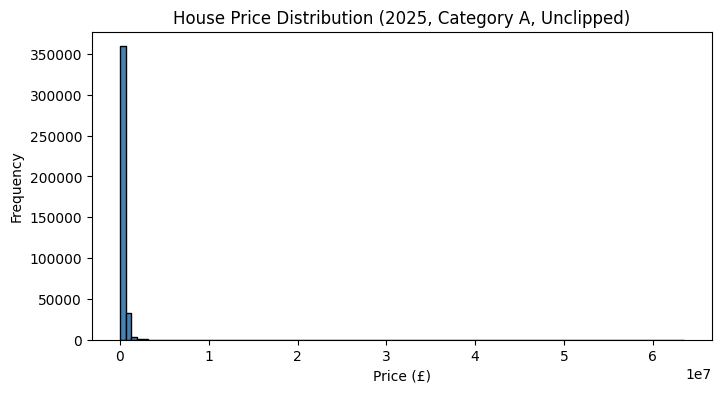

In [18]:
plt.figure(figsize=(8,4))
plt.hist(df2025["price"], bins=100, color="steelblue", edgecolor="black")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.title("House Price Distribution (2025, Category A, Unclipped)")
plt.show()


Not much of the Histogram can be seen due to the large amounts of skewing thus we will clip the large end for plotting purposes.

In [22]:
def plot_histogram(data, clip_percentiles=None, bins=50, show_median=True, show_mode=True, title="Histogram"):
    # Clip data if necassary
    if clip_percentiles != None:
        min_percentile, max_percentile = clip_percentiles
        clipped_data = data[ (data >= data.quantile(min_percentile)) & (data <= data.quantile(max_percentile))]
    

    # Compute mode and median if necassary
    if show_median: median_value = clipped_data.median()
    if show_mode: 
        counts, bin_edges = np.histogram(clipped_data, bins)
        mode_index = np.argmax(counts)
        mode_value = (bin_edges[mode_index] + bin_edges[mode_index+1]) / 2


    # Plotting
    plt.figure(figsize=(8,4))
    plt.hist(clipped_data, bins, color="grey", edgecolor="black", alpha=0.7)

    if show_median:
        plt.axvline(median_value, color = "red", linestyle = "--", label = f"Median: {median_value:.2f}")
    if show_mode:
        plt.axvline(mode_value, color = "blue", linestyle = "--", label = f"Mode: {mode_value:.2f}")
    if show_median or show_mode:
        plt.axvline(clipped_data.mean(), color = "green", linestyle = "--", label = f"Mean: {clipped_data.mean():.2f}")

    plt.xlabel("Price (£)")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.legend()
    plt.show()


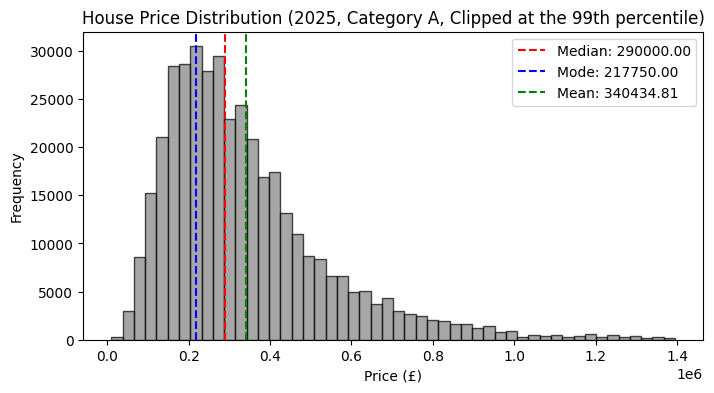

In [23]:
min_max = [0, 0.99]
plot_histogram(df2025["price"], clip_percentiles=[0, 0.99], bins = 50, show_median=True, show_mode=True, title="House Price Distribution (2025, Category A, Clipped at the 99th percentile)")

This gives a much better representation of what we have previosly discussed. 